In [112]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
from itertools import combinations

In [113]:
# Data loading
base_dir = "E:\\korepetycje_Jakub_Bozek"
os.chdir(base_dir)
file_name = "Descriptors.xlsx"
data = pd.read_excel(file_name)

In [114]:
#Basic informations
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Columns: 211 entries, Name to fr_urea
dtypes: float64(103), int64(107), object(1)
memory usage: 33.1+ KB
None
       MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
count          20.000000       20.000000          20.000000       20.000000   
mean            8.587107        8.587107           0.321228       -1.252924   
std             2.557957        2.557957           0.260948        0.943939   
min             5.174287        5.174287           0.008611       -2.648601   
25%             6.061779        6.061779           0.092806       -2.020616   
50%             9.315445        9.315445           0.275899       -1.282654   
75%            10.475857       10.475857           0.479610       -0.715730   
max            12.455509       12.455509           1.011373        0.491169   

             qed        SPS       MolWt  HeavyAtomMolWt  ExactMolWt  \
count  20.000000  20.000000   20.0000

In [115]:
#Data cleansing
data = data.dropna()


In [116]:
#Removal of columns with zero standard deviation

numeric_data = data.select_dtypes(include=['number'])
std_deviation = numeric_data.std()
columns_to_drop = std_deviation[std_deviation == 0].index
data = data.drop(columns=columns_to_drop)



In [117]:
# 4. Identify and remove outliers (3 sigma rule)
print("Shape of data before outlier removal:", data.shape)
numeric_data = data.select_dtypes(include=['number'])
mask = pd.Series([True] * len(data), index=data.index)
for col in numeric_data.columns:
    mean = data[col].mean()
    std = data[col].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    mask &= data[col].between(lower_bound, upper_bound)
data = data[mask]
print("Shape of data after outlier removal:", data.shape)

Shape of data before outlier removal: (20, 148)
Shape of data after outlier removal: (14, 148)


In [118]:
# Normalize data
numeric_data = data.select_dtypes(include=['number'])
scaler = StandardScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_data.columns)

In [119]:
# Variables of interest
variables = ['MolWt', 'Chi0n', 'TPSA', 'NumHAcceptors', 'fr_benzene']

In [120]:
# Filter only existing variables after cleaning
variables = [var for var in variables if var in data.columns and var in data_normalized.columns]
print(f"Variables used: {variables}")

Variables used: ['MolWt', 'Chi0n', 'TPSA', 'NumHAcceptors', 'fr_benzene']


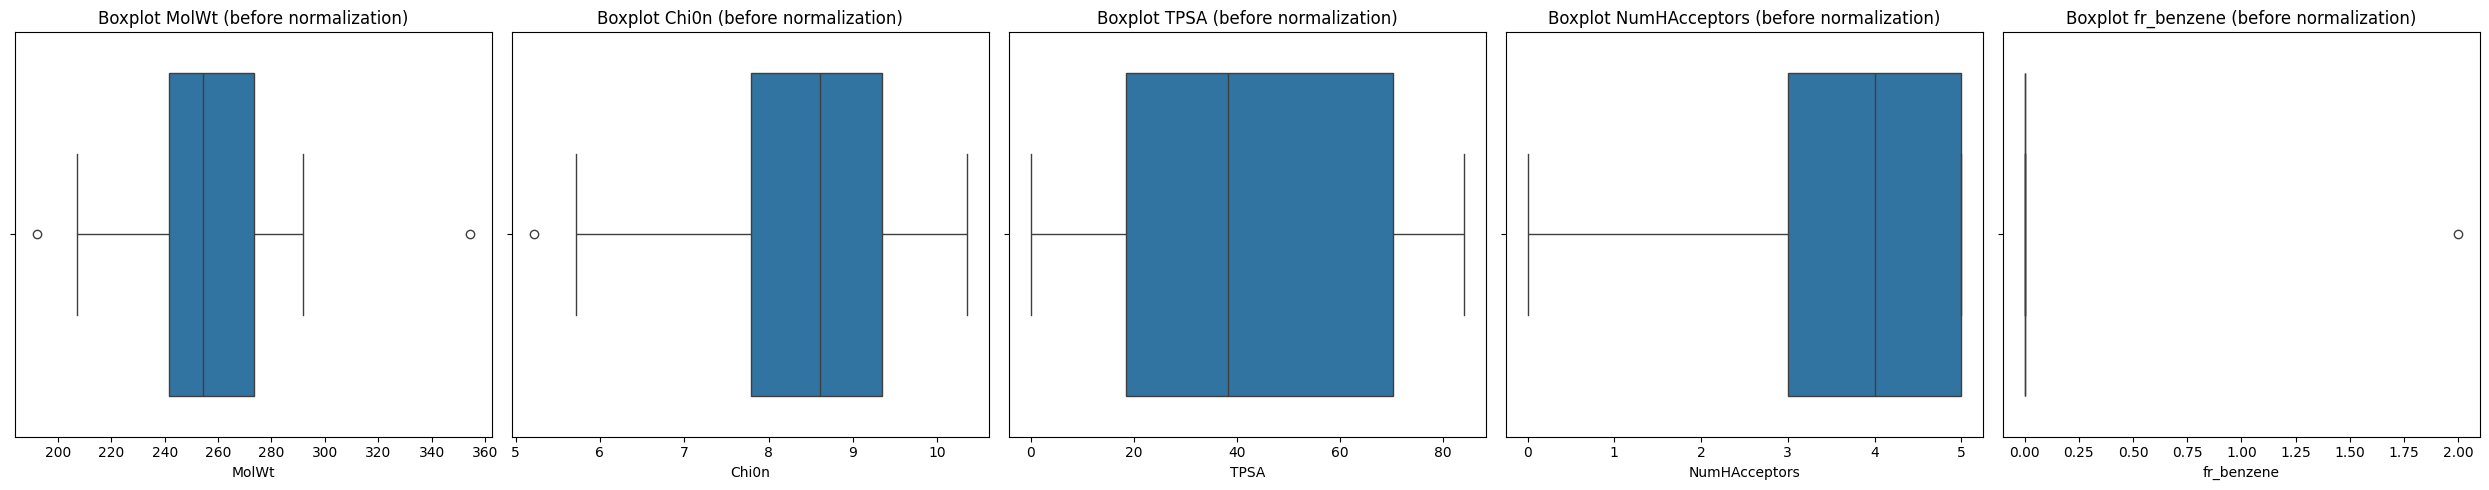

In [121]:
# 1. Boxplots before normalization
fig, axes = plt.subplots(1, len(variables), figsize=(5 * len(variables), 5))
for ax, col in zip(axes, variables):
    sns.boxplot(x=data[col], ax=ax)
    ax.set_title(f'Boxplot {col} (before normalization)')
plt.tight_layout()
plt.show()

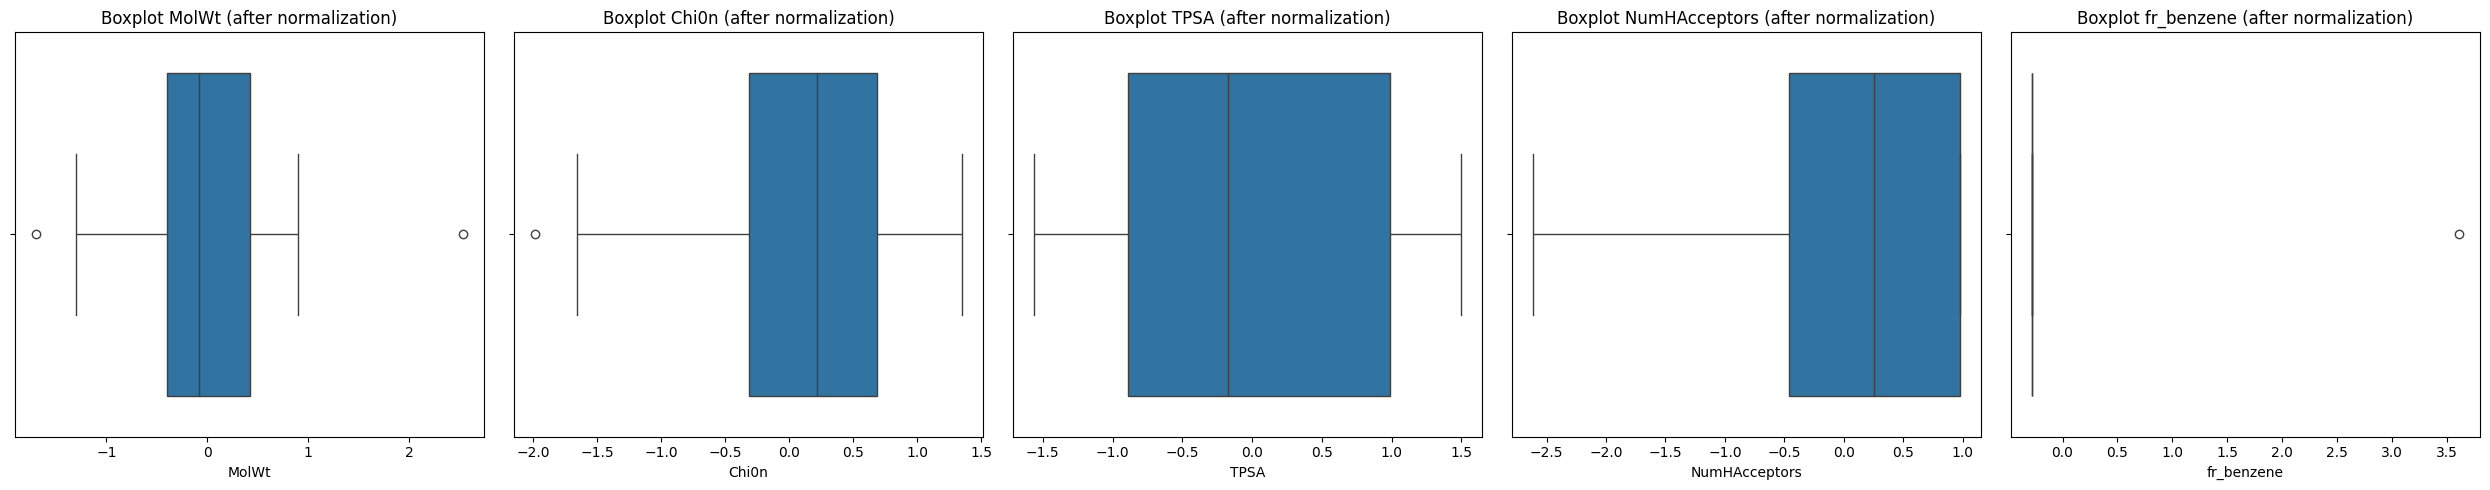

In [122]:
# 2. Boxplots after normalization
fig, axes = plt.subplots(1, len(variables), figsize=(5 * len(variables), 5))
for ax, col in zip(axes, variables):
    sns.boxplot(x=data_normalized[col], ax=ax)
    ax.set_title(f'Boxplot {col} (after normalization)')
plt.tight_layout()
plt.show()


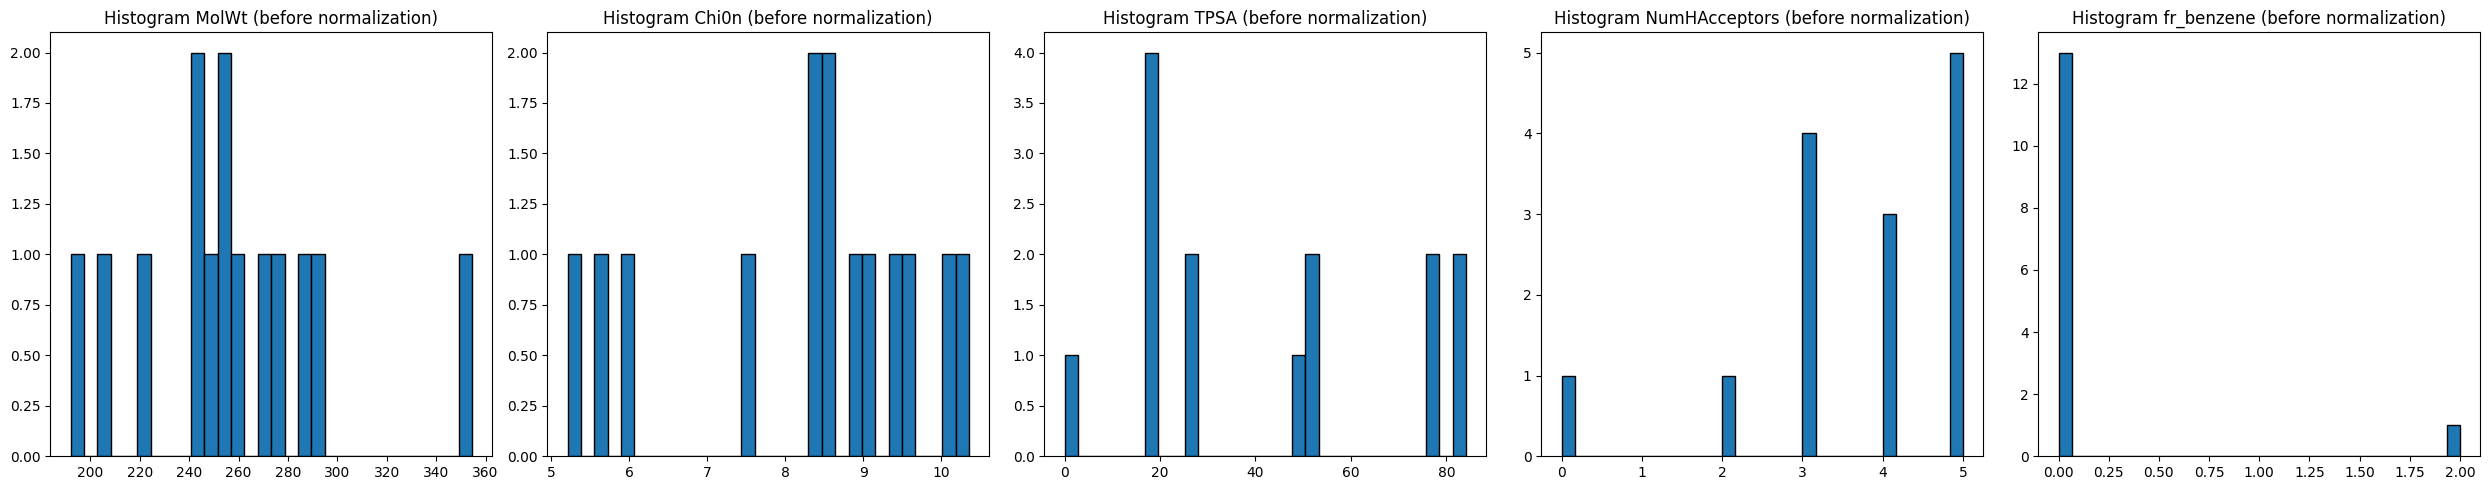

In [123]:
# 3. Histograms before normalization
fig, axes = plt.subplots(1, len(variables), figsize=(5 * len(variables), 5))
for ax, col in zip(axes, variables):
    ax.hist(data[col], bins=30, edgecolor='black')
    ax.set_title(f'Histogram {col} (before normalization)')
plt.tight_layout()
plt.show()

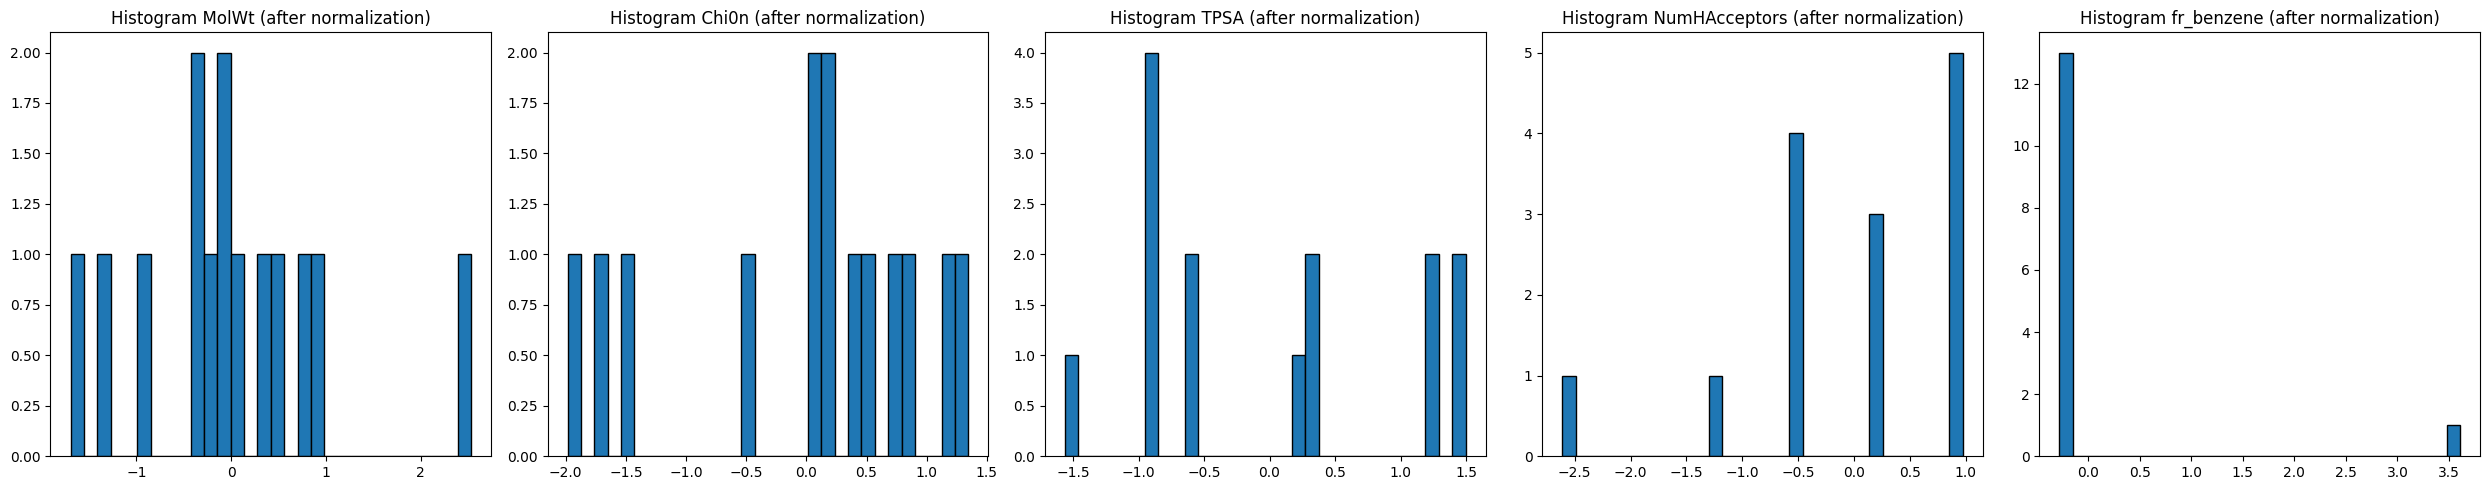

In [124]:
# 4. Histograms after normalization
fig, axes = plt.subplots(1, len(variables), figsize=(5 * len(variables), 5))
for ax, col in zip(axes, variables):
    ax.hist(data_normalized[col], bins=30, edgecolor='black')
    ax.set_title(f'Histogram {col} (after normalization)')
plt.tight_layout()
plt.show()

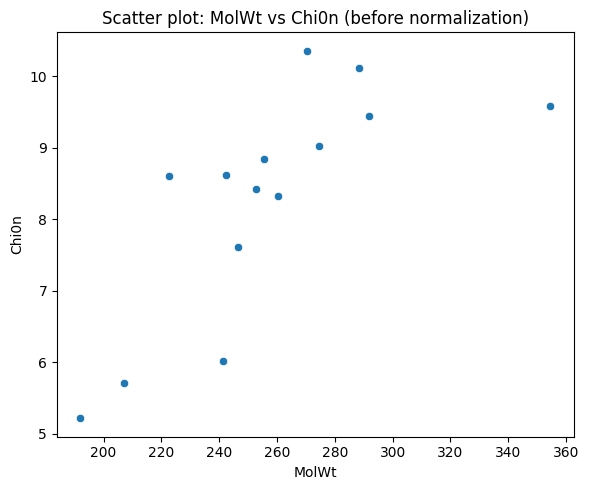

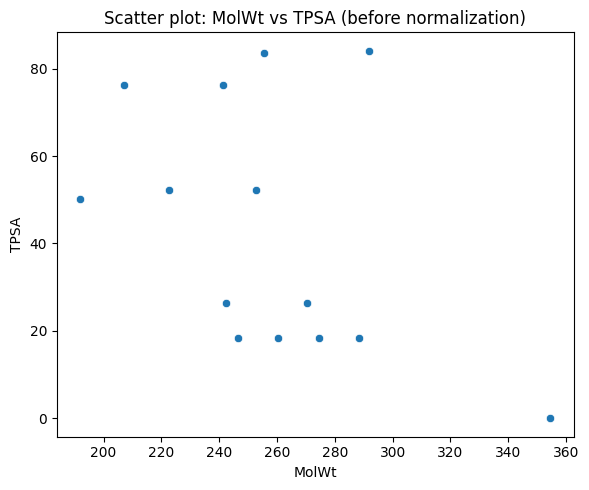

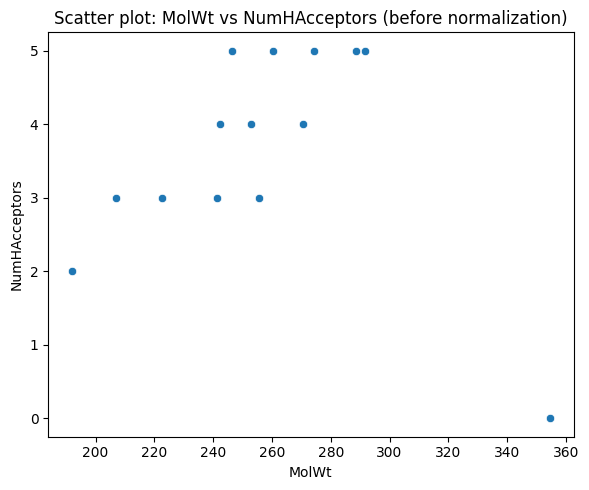

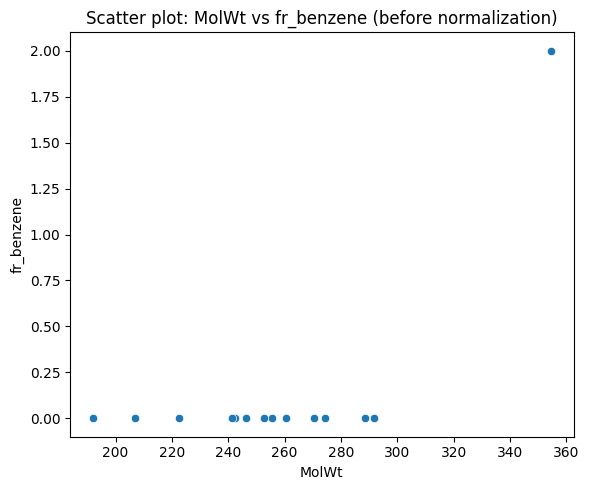

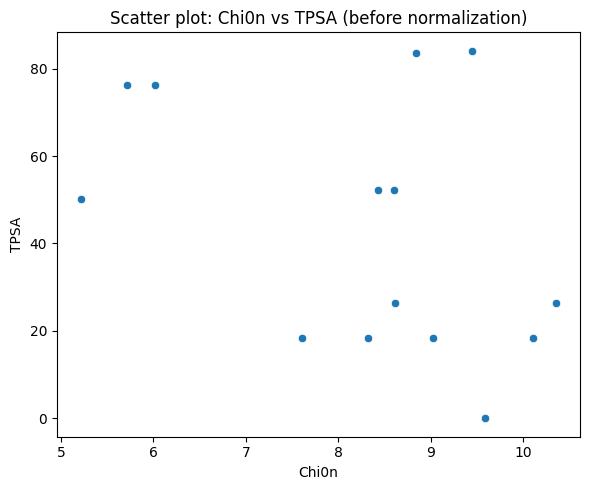

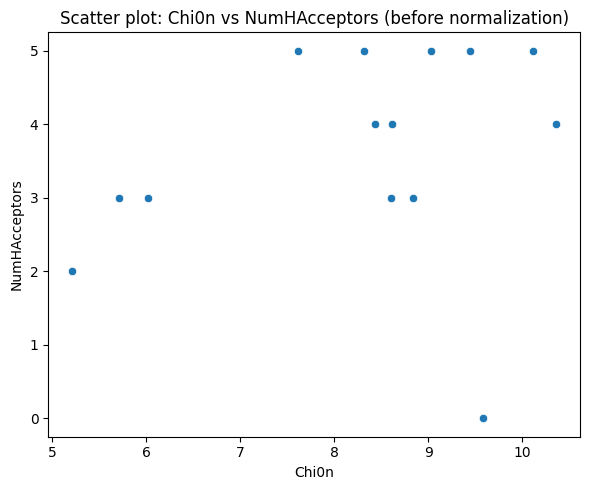

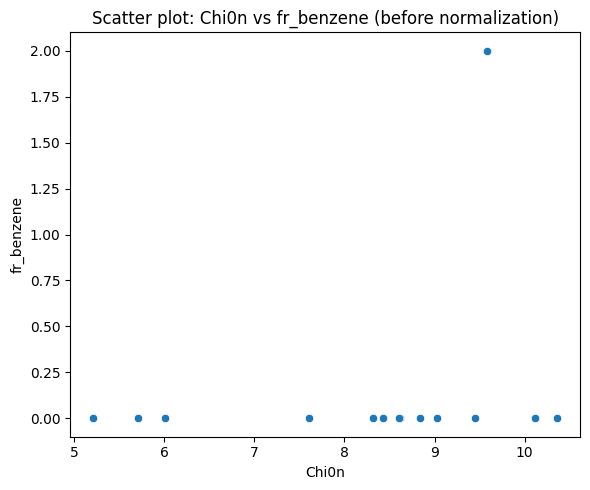

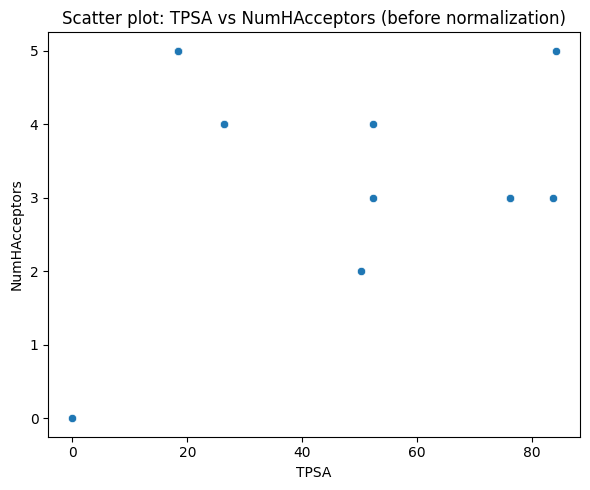

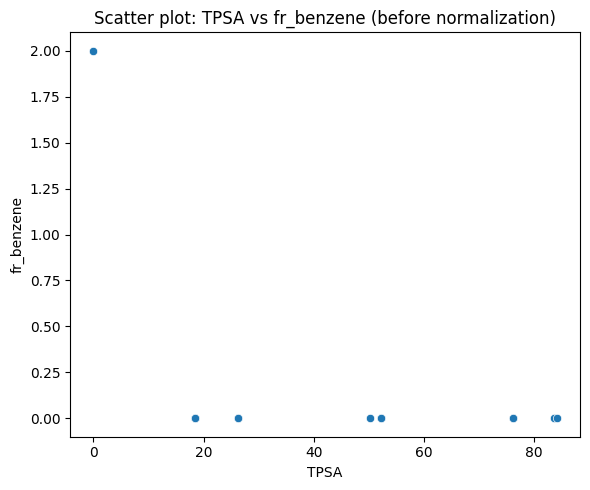

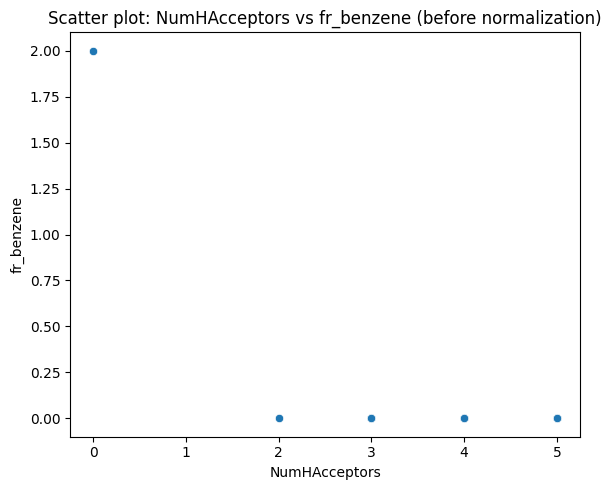

In [125]:
# Scatter plots for each pair of variables (before normalization)
pairs = list(combinations(variables, 2))
for x, y in pairs:
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=data[x], y=data[y])
    plt.title(f'Scatter plot: {x} vs {y} (before normalization)')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()

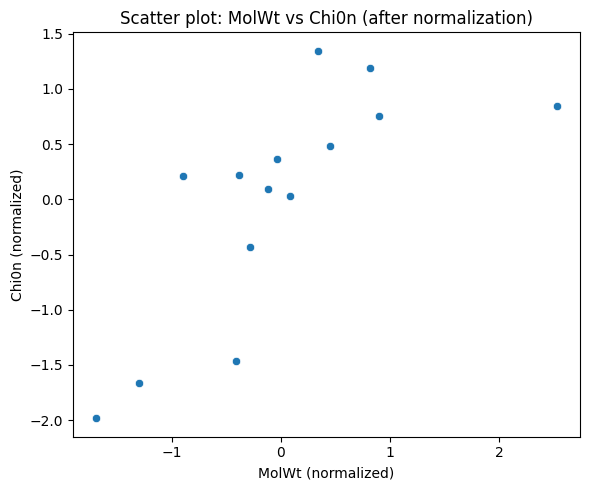

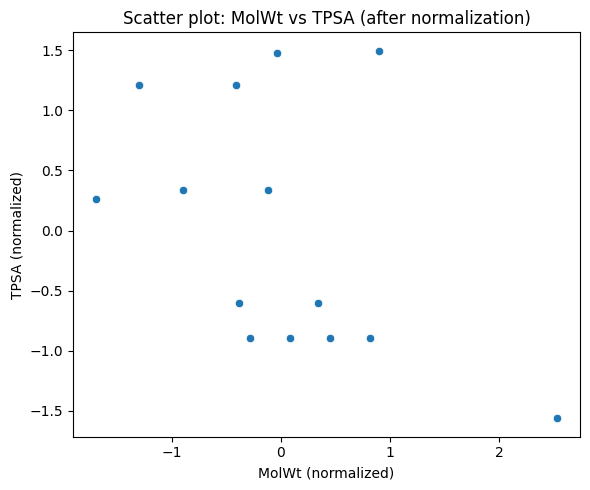

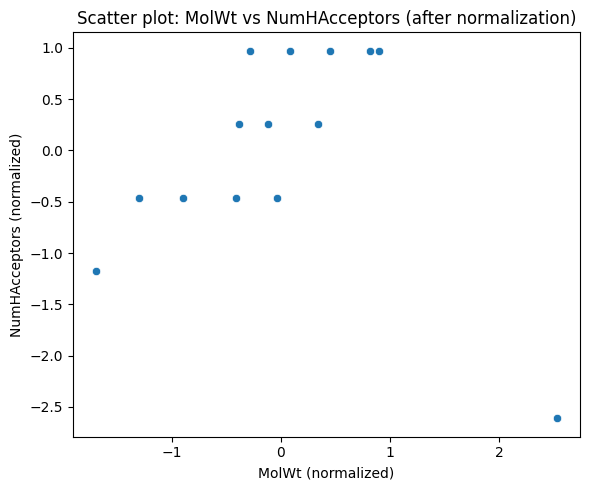

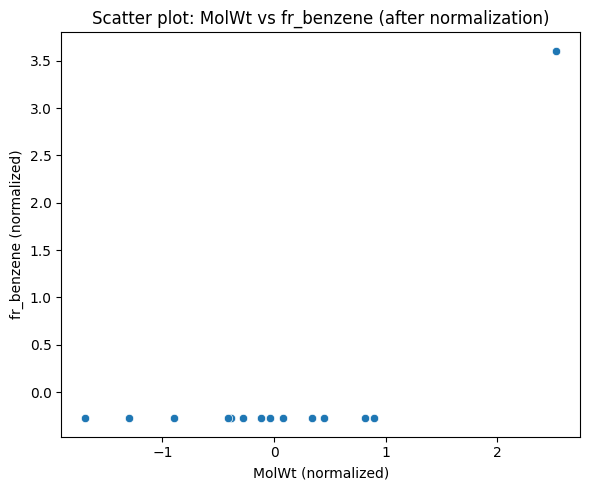

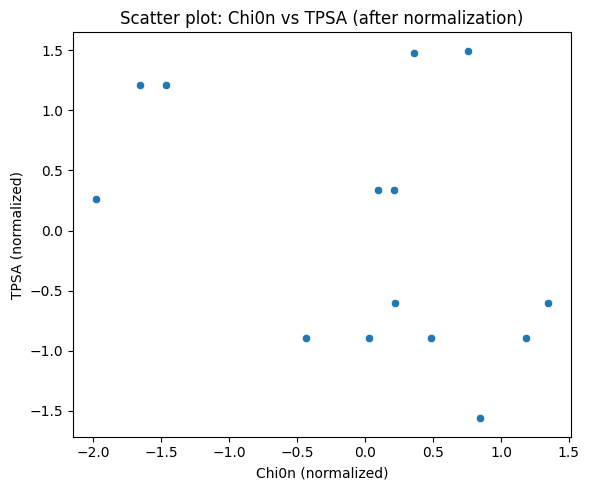

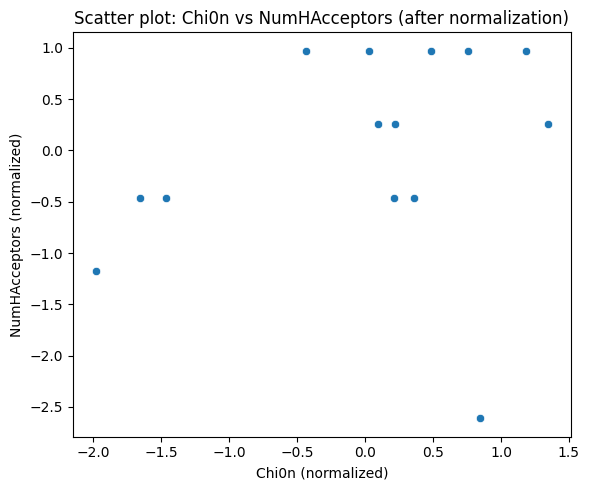

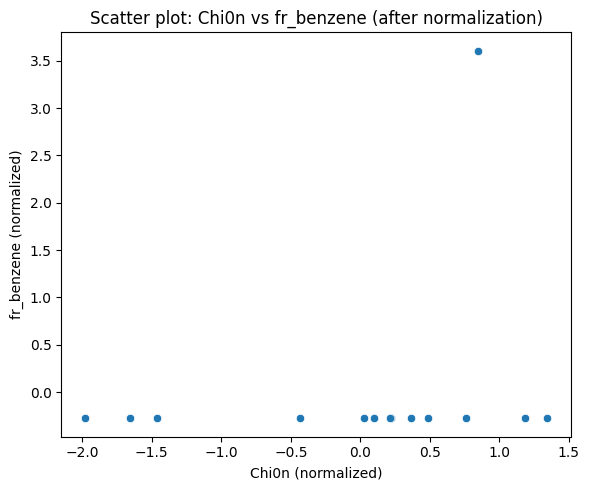

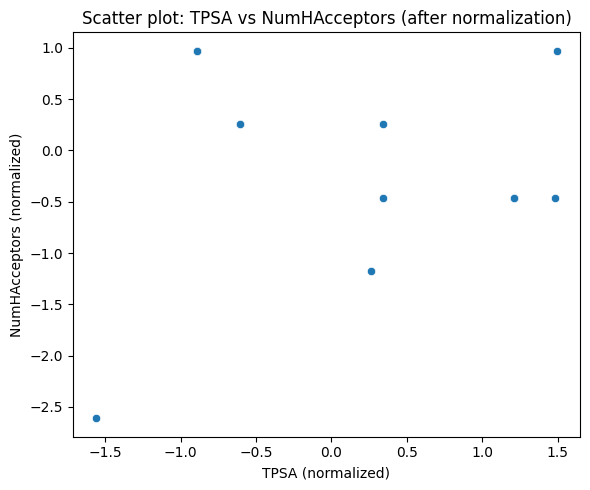

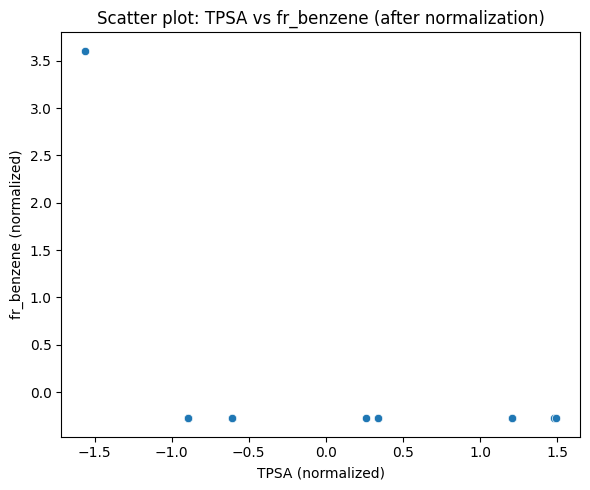

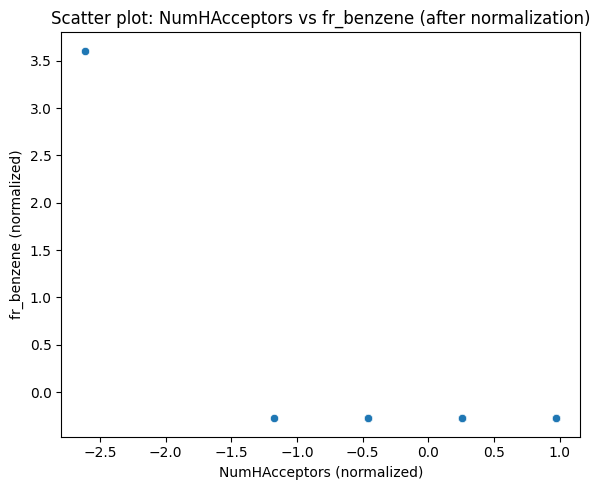

In [126]:
# Scatter plots for each pair of variables (after normalization)
for x, y in pairs:
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=data_normalized[x], y=data_normalized[y])
    plt.title(f'Scatter plot: {x} vs {y} (after normalization)')
    plt.xlabel(f'{x} (normalized)')
    plt.ylabel(f'{y} (normalized)')
    plt.tight_layout()
    plt.show()

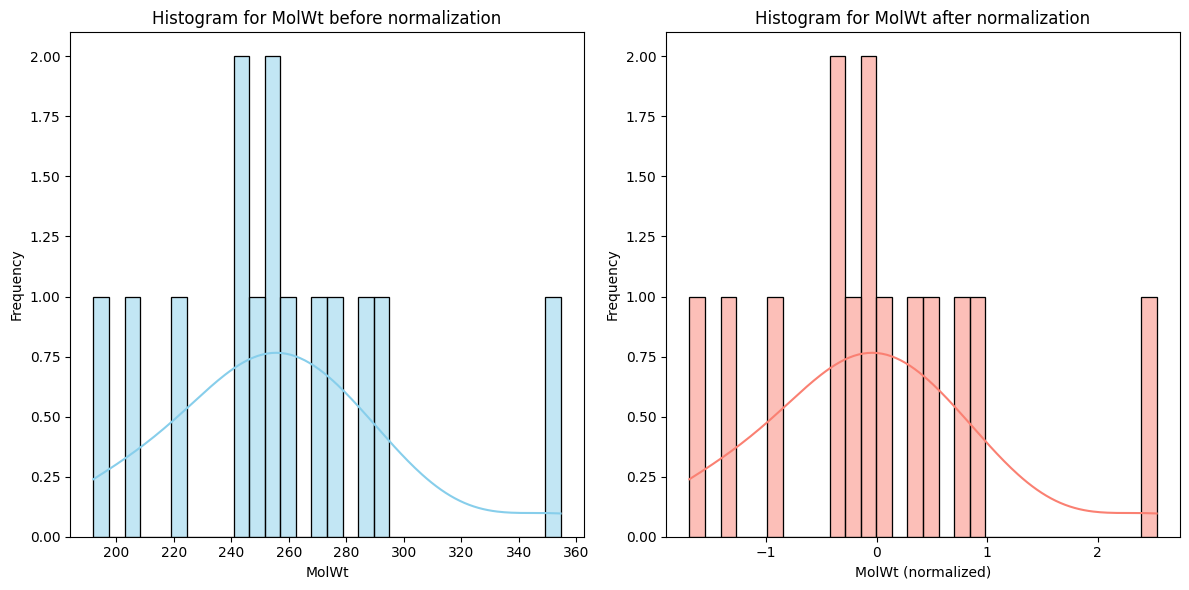

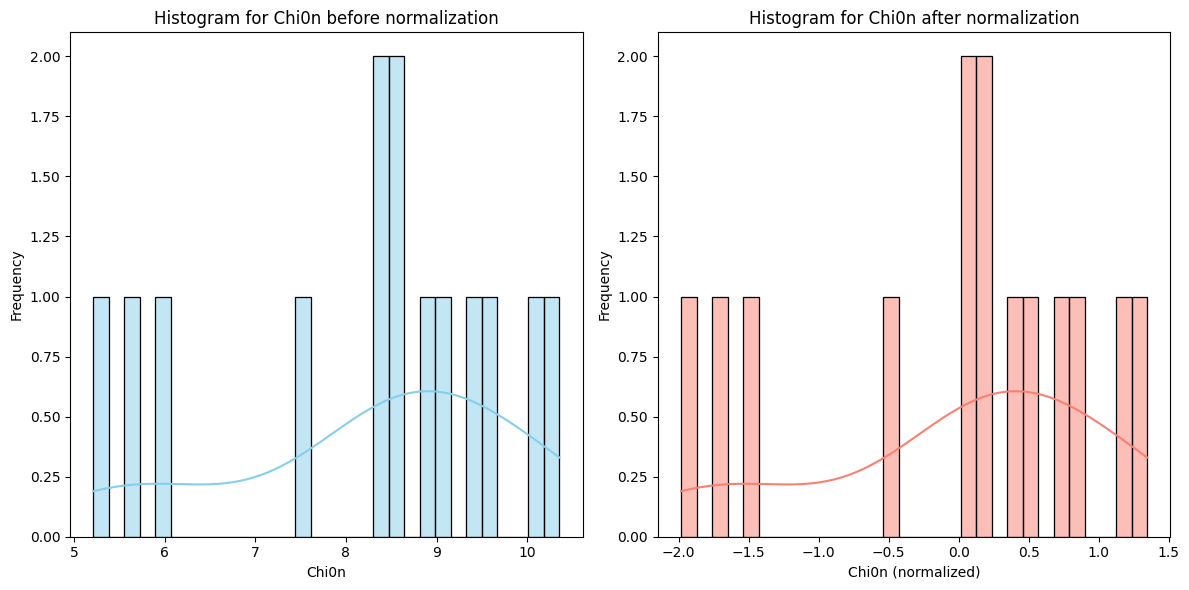

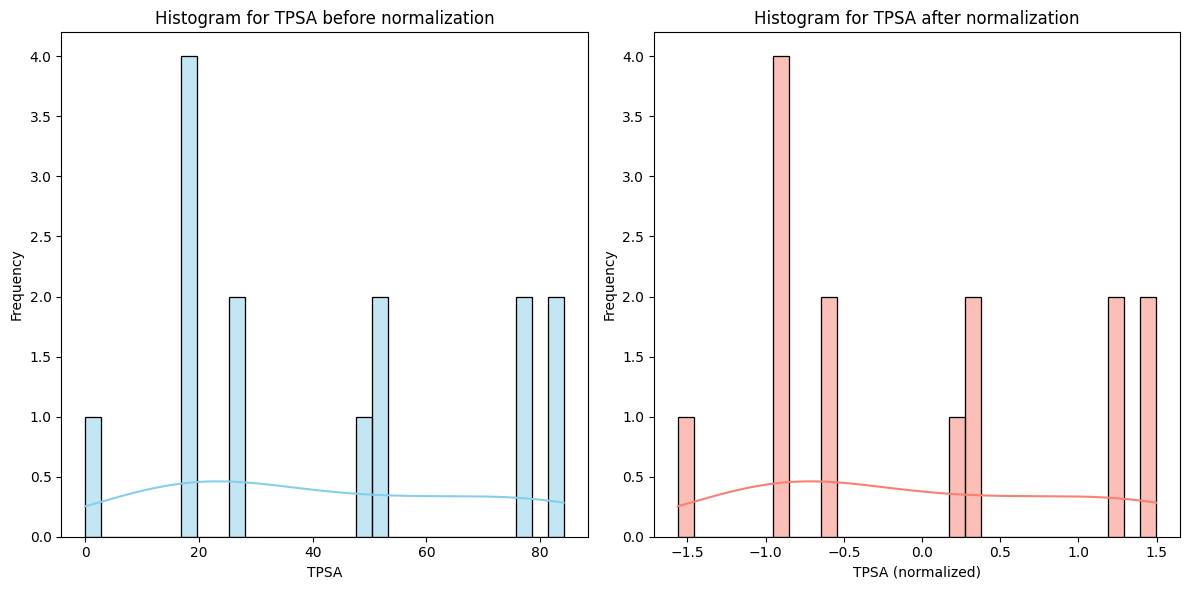

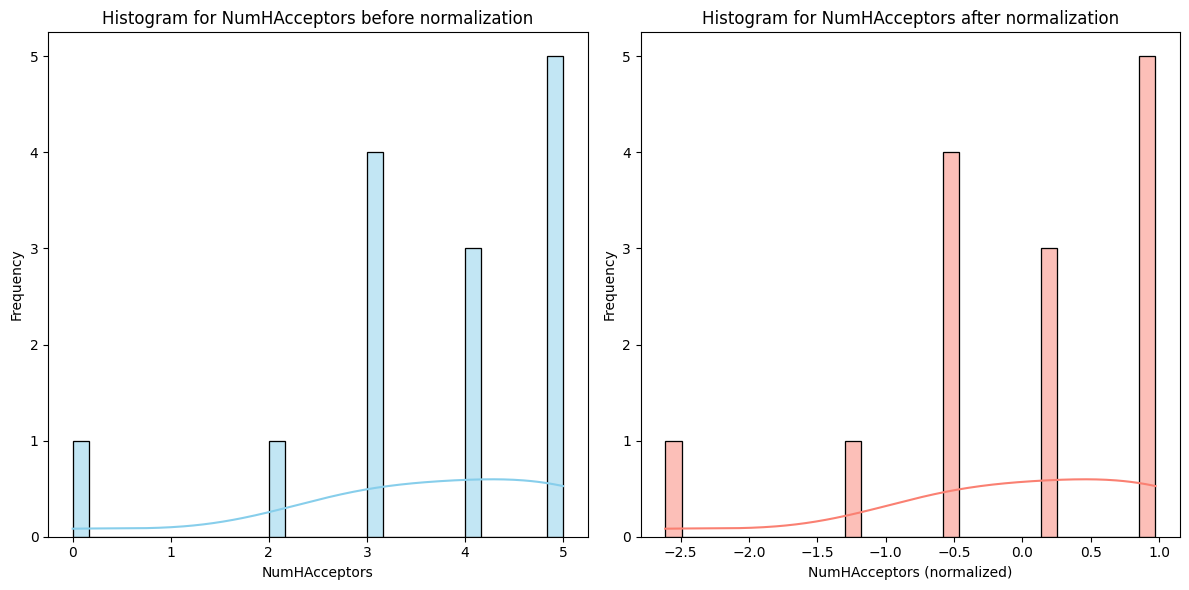

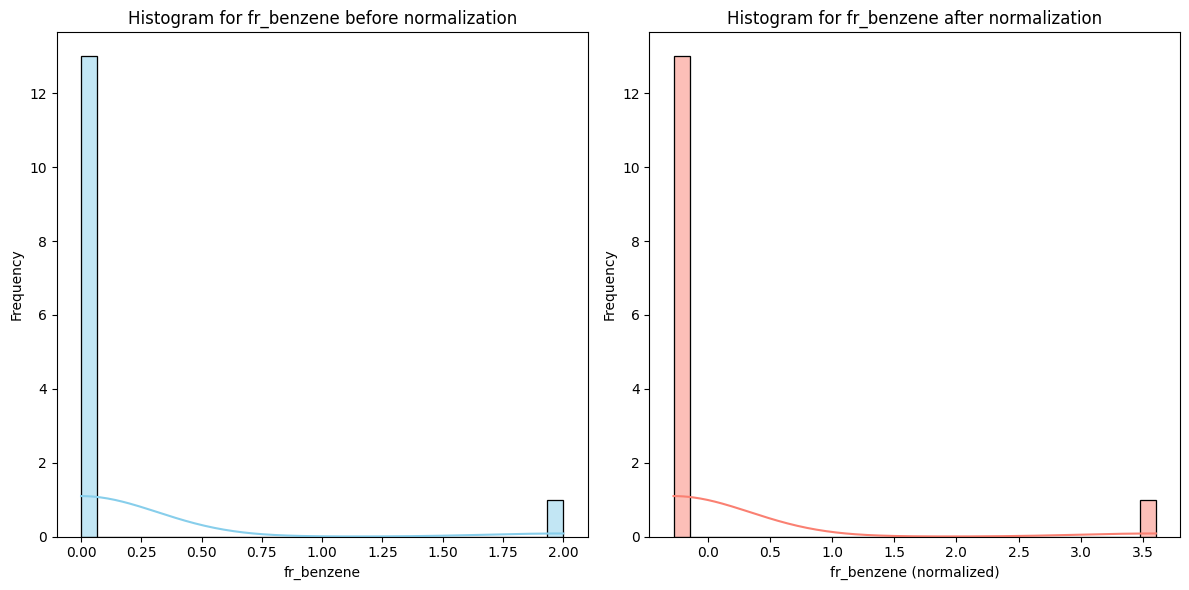

In [127]:
for var in variables:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data[var], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram for {var} before normalization')
    plt.xlabel(var)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.histplot(data_normalized[var], kde=True, bins=30, color='salmon')
    plt.title(f'Histogram for {var} after normalization')
    plt.xlabel(f'{var} (normalized)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

=== Multiple Regression Example ===
Regression coefficients: [3.03147297 1.98968018]
Intercept: 0.8954725172759481
R²: 0.9926, MSE: 68.5193
plot_explanatory_vs_response: Only available for simple linear regression (1 explanatory variable).
plot_regression: Only available for simple linear regression (1 explanatory variable).


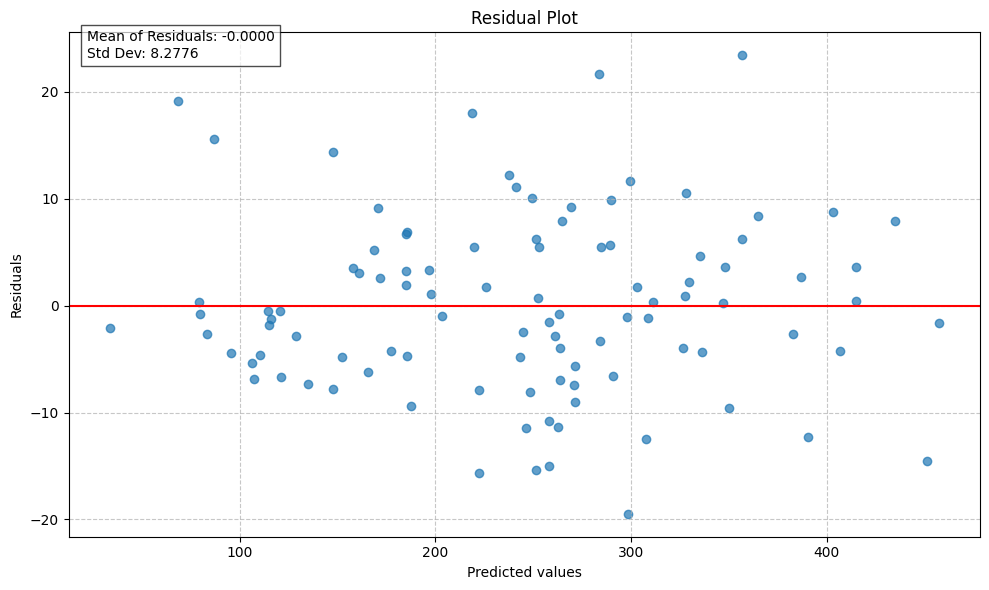

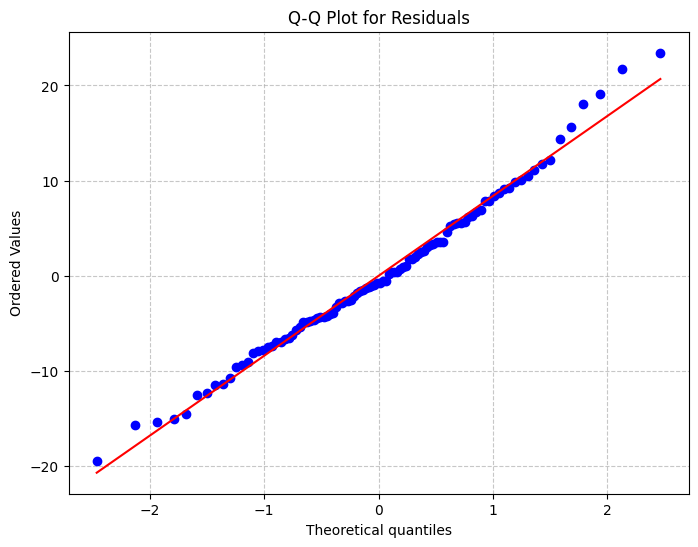


=== Simple Linear Regression Example ===
Regression coefficients: [4.01145538]
Intercept: 1.3066932319914883
R²: 0.9921, MSE: 94.3850


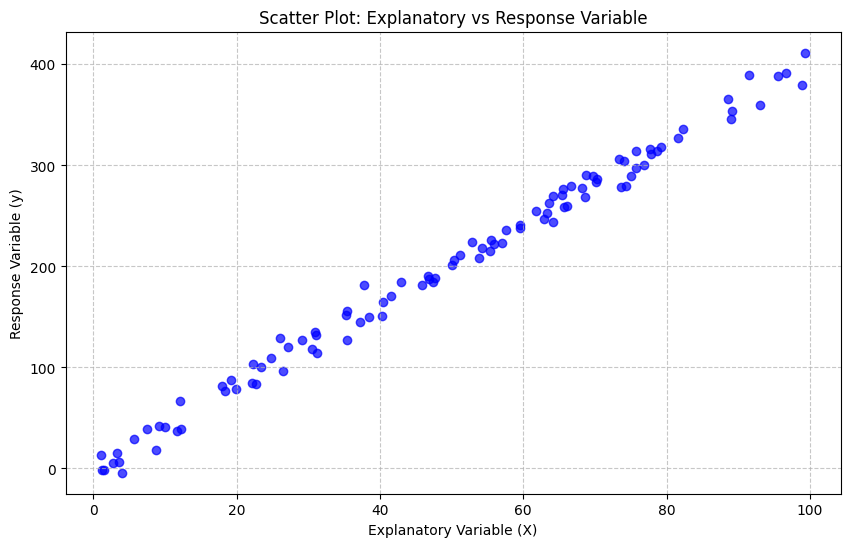

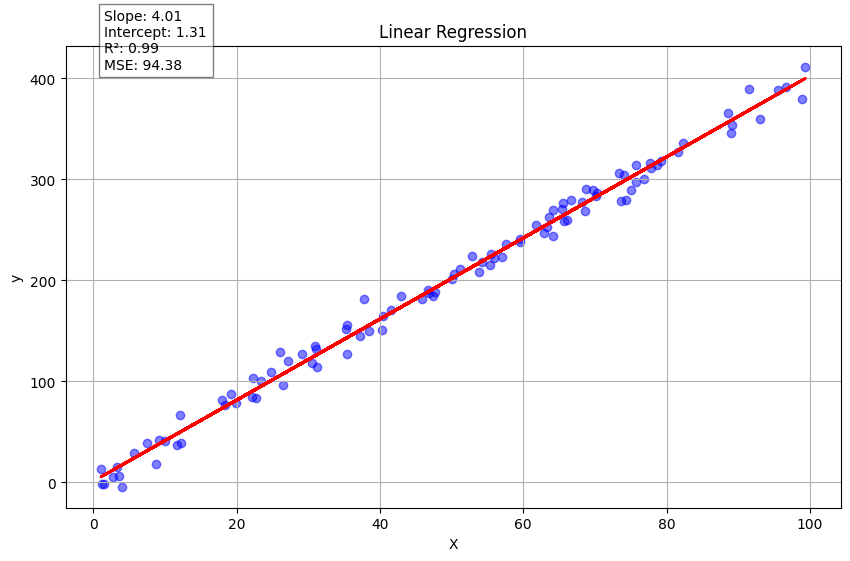

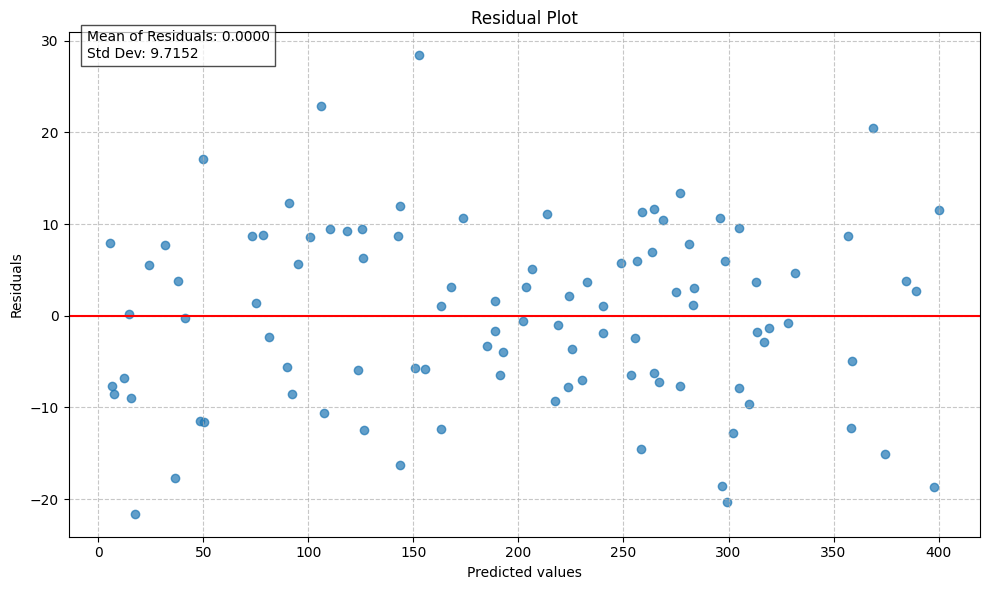

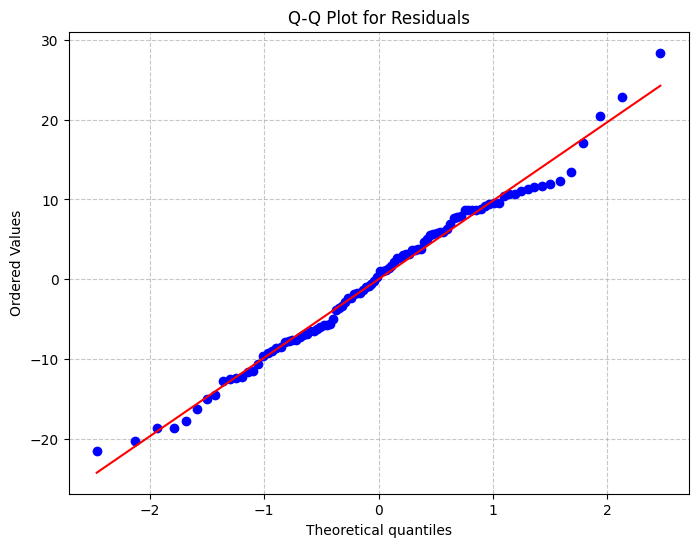

In [136]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

class RegressionModel:
    def __init__(self, X, y, min_beta=None, max_beta=None, delta=None):
        self.X = X
        self.y = y
        self.min_beta = min_beta
        self.max_beta = max_beta
        self.delta = delta
        self.model = LinearRegression()
        self.y_pred = None
        self.coef = None
        self.intercept = None
        self.r2 = None
        self.mse = None

    def fit(self):
        """Train the regression model and enforce coefficient constraints"""
        self.model.fit(self.X, self.y)
        self.y_pred = self.model.predict(self.X)
        self.coef = self.model.coef_
        self.intercept = self.model.intercept_
        self.r2 = self.model.score(self.X, self.y)
        self.mse = np.mean((self.y - self.y_pred) ** 2)

        print("Regression coefficients:", self.coef)
        print("Intercept:", self.intercept)
        print(f'R²: {self.r2:.4f}, MSE: {self.mse:.4f}')

        # Apply constraints
        if self.min_beta is not None:
            self.coef = np.maximum(self.coef, self.min_beta)
        if self.max_beta is not None:
            self.coef = np.minimum(self.coef, self.max_beta)

    def plot_explanatory_vs_response(self):
        """Plot explanatory variable vs response variable (only for simple linear regression)"""
        if self.X.shape[1] == 1:
            plt.figure(figsize=(10, 6))
            plt.scatter(self.X, self.y, alpha=0.7, color='blue')
            plt.xlabel("Explanatory Variable (X)")
            plt.ylabel("Response Variable (y)")
            plt.title("Scatter Plot: Explanatory vs Response Variable")
            plt.grid(True, linestyle="--", alpha=0.7)
            plt.show()
        else:
            print("plot_explanatory_vs_response: Only available for simple linear regression (1 explanatory variable).")

    def plot_regression(self):
        """Plot regression if only one predictor variable exists"""
        if self.X.shape[1] == 1:
            plt.figure(figsize=(10, 6))
            plt.scatter(self.X, self.y, color='blue', alpha=0.5)
            plt.plot(self.X, self.y_pred, color='red', linewidth=2)
            plt.title('Linear Regression')
            plt.xlabel('X')
            plt.ylabel('y')
            plt.text(0.05, 0.95,
                     f'Slope: {self.coef[0]:.2f}\nIntercept: {self.intercept:.2f}\nR²: {self.r2:.2f}\nMSE: {self.mse:.2f}',
                     transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
            plt.grid(True)
            plt.show()
        else:
            print("plot_regression: Only available for simple linear regression (1 explanatory variable).")

    def plot_residuals(self):
        """Plot residuals"""
        residuals = self.y - self.y_pred
        plt.figure(figsize=(10, 6))
        plt.scatter(self.y_pred, residuals, alpha=0.7)
        plt.axhline(y=0, color='red', linestyle='-')
        plt.xlabel('Predicted values')
        plt.ylabel('Residuals')
        plt.title('Residual Plot')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.text(0.02, 0.95,
                 f'Mean of Residuals: {np.mean(residuals):.4f}\nStd Dev: {np.std(residuals):.4f}',
                 transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.7))
        plt.tight_layout()
        plt.show()

    def plot_qq(self):
        """Plot Q-Q plot for residuals"""
        residuals = self.y - self.y_pred
        plt.figure(figsize=(8, 6))
        stats.probplot(residuals, dist="norm", plot=plt)
        plt.title("Q-Q Plot for Residuals")
        plt.grid(True, linestyle="--", alpha=0.7)
        plt.show()


# ======= Multiple Regression Example =======
print("=== Multiple Regression Example ===")
X_multi = np.random.rand(100, 2) * 100  # 2 independent variables
y_multi = 3 * X_multi[:, 0] + 2 * X_multi[:, 1] + np.random.randn(100) * 10  # Multi-variable regression

min_beta_multi = np.array([0, 1])
max_beta_multi = np.array([5, 5])
delta_multi = np.array([0.1, 0.2])

regression_multi = RegressionModel(X_multi, y_multi, min_beta_multi, max_beta_multi, delta_multi)
regression_multi.fit()

regression_multi.plot_explanatory_vs_response()
regression_multi.plot_regression()
regression_multi.plot_residuals()
regression_multi.plot_qq()

# ======= Simple Linear Regression Example =======
print("\n=== Simple Linear Regression Example ===")
X_simple = np.random.rand(100, 1) * 100  # 1 independent variable
y_simple = 4 * X_simple[:, 0] + np.random.randn(100) * 10  # Simple linear regression

min_beta_simple = np.array([0])
max_beta_simple = np.array([5])
delta_simple = np.array([0.1])

regression_simple = RegressionModel(X_simple, y_simple, min_beta_simple, max_beta_simple, delta_simple)
regression_simple.fit()

regression_simple.plot_explanatory_vs_response()
regression_simple.plot_regression()
regression_simple.plot_residuals()
regression_simple.plot_qq()


In [137]:
import numpy as np
import matplotlib.pyplot as plt

class MyLinearRegression:
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
        self.coef_ = None
        self.intercept_ = None
        self.is_fitted = False

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        if y.ndim == 1:
            y = y.reshape(-1, 1)

        if self.fit_intercept:
            X = np.hstack([np.ones((X.shape[0], 1)), X])

        XtX = np.dot(X.T, X)
        Xty = np.dot(X.T, y)
        beta = np.linalg.pinv(XtX).dot(Xty)

        if self.fit_intercept:
            self.intercept_ = beta[0]
            self.coef_ = beta[1:].flatten()
        else:
            self.intercept_ = 0.0
            self.coef_ = beta.flatten()

        self.is_fitted = True
        return self

    def predict(self, X):
        if not self.is_fitted:
            raise Exception("The model is not fitted yet. Please call fit() first.")
        
        X = np.array(X)
        
        if self.fit_intercept:
            X = np.hstack([np.ones((X.shape[0], 1)), X])
            beta = np.hstack([self.intercept_, self.coef_])
        else:
            beta = self.coef_
        
        return np.dot(X, beta)

    def score(self, X, y):
        y_pred = self.predict(X)
        y = np.array(y)
        residual_sum_of_squares = ((y - y_pred) ** 2).sum()
        total_sum_of_squares = ((y - y.mean()) ** 2).sum()
        return 1 - residual_sum_of_squares / total_sum_of_squares

    def get_params(self, deep=True):
        return {"fit_intercept": self.fit_intercept}

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

    def plot(self, X, y):
        """
        Plots the data points and the regression line (for 1D X).
        """
        if X.shape[1] != 1:
            raise ValueError("Plotting is only supported for single feature (1D) data.")

        y_pred = self.predict(X)

        plt.figure(figsize=(8, 5))
        plt.scatter(X, y, color="blue", label="Data points")
        plt.plot(X, y_pred, color="red", label="Regression line")
        plt.xlabel("X")
        plt.ylabel("y")
        plt.title("Linear Regression")
        plt.legend()
        plt.show()


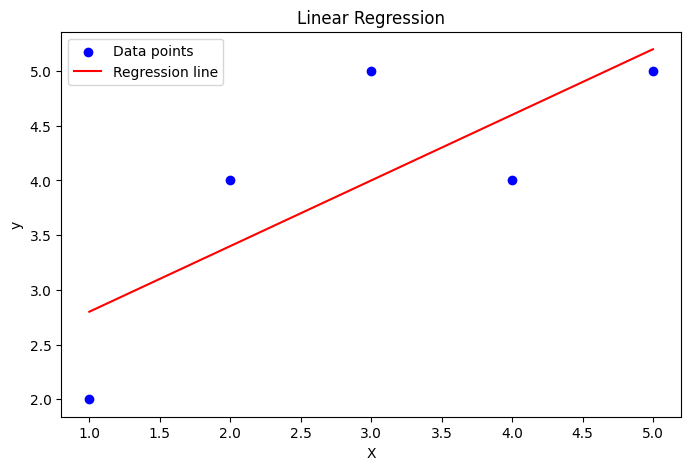

In [138]:

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])
model = MyLinearRegression()
model.fit(X, y)
model.plot(X, y)
